<a href="https://colab.research.google.com/github/EshwarArya/automaticticketassignment/blob/master/Capstoneoject_may_2020_AIML_Eshwar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import time
import string

from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

import re
import nltk
import pickle
from nltk.tokenize import WordPunctTokenizer,word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords

#nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.stem.wordnet import WordNetLemmatizer
#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Loading the Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Loading the dataset
df = pd.read_excel("/content/drive/My Drive/Input Data Synthetic.xlsx")

In [93]:
#Have a look at first five rows in dataset
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
#number of rows and columns
df.shape

(8500, 4)

**Description - There are 8500 observations and 4 features**

In [7]:
#Datatypes of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Description -All the 4 attributes are of object type**

In [51]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Description - There are null values in 'Short description' and 'Description' columns.**

In [0]:
#Dropping the column Caller as it is insignificant for our model
df = df.drop(['Caller'],axis = 1)

In [53]:
df = df.dropna()
df = df.reset_index(drop=True)
print(df.isnull().sum())
df_test = pd.DataFrame(df)

Short description    0
Description          0
Assignment group     0
dtype: int64


In [54]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique group',len(set(df['Assignment group'])))

Shape of dataset  (8491, 3)
Index(['Short description', 'Description', 'Assignment group'], dtype='object')
No. of unique group 74


In [55]:
df['Assignment group'].value_counts()

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_73       1
GRP_67       1
GRP_35       1
GRP_61       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [14]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [0]:
#Lets check count words according to the group
df['target'] = df['Assignment group'].astype('category').cat.codes
df['num_words'] = df.Description.apply(lambda x : len(x.split()))
df['bins']=pd.cut(df.num_words, bins=[0,100,300,500,1000, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>1000'])

In [57]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution.head()

,bins,counts
0,0-100,8086
1,100-300,361
2,300-500,18
3,500-800,12
4,>1000,12


Text(0.5, 1.0, 'Word distribution per bin')

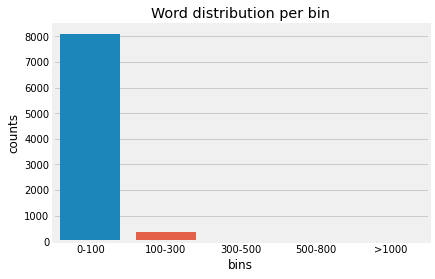

In [58]:
#Let visualize the words count as per the bins(including group)
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [59]:
#Load head 10 records in the dataset
df.head(10)

,Short description,Description,Assignment group,target,num_words,bins
0,login issue,-verified user details.(employee# & manager na...,GRP_0,0,33,0-100
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,0,25,0-100
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,0,11,0-100
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,0,5,0-100
4,skype error,skype error,GRP_0,0,2,0-100
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,0,9,0-100
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,1,11,0-100
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,0,9,0-100
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,0,7,0-100
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,0,4,0-100


In [60]:
macronum=sorted(set(df['Assignment group']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def reassigngroupid(i):
    return macro_to_id[i]

print(macronum)
print(macro_to_id)


['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30', 'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9']
{'GRP_0': 0, 'GRP_1': 1, 'GRP_10': 2, 'GRP_11': 3, 'GRP_12': 4, 'GRP_13': 5, 'GRP_14': 6, 'GRP_15': 7, 'GRP_16': 8, 'GRP_17': 9, 'GRP_18': 10, 'GRP_19': 11, 'GRP_2': 12, 'GRP_20': 13, 'GRP_21': 14, 'GRP_22': 15, 'GRP_23': 16, 'GRP_24': 17, 'GRP_25': 18, 'GRP_26': 19, '

In [0]:
df['Assignment group']=df['Assignment group'].apply(reassigngroupid)

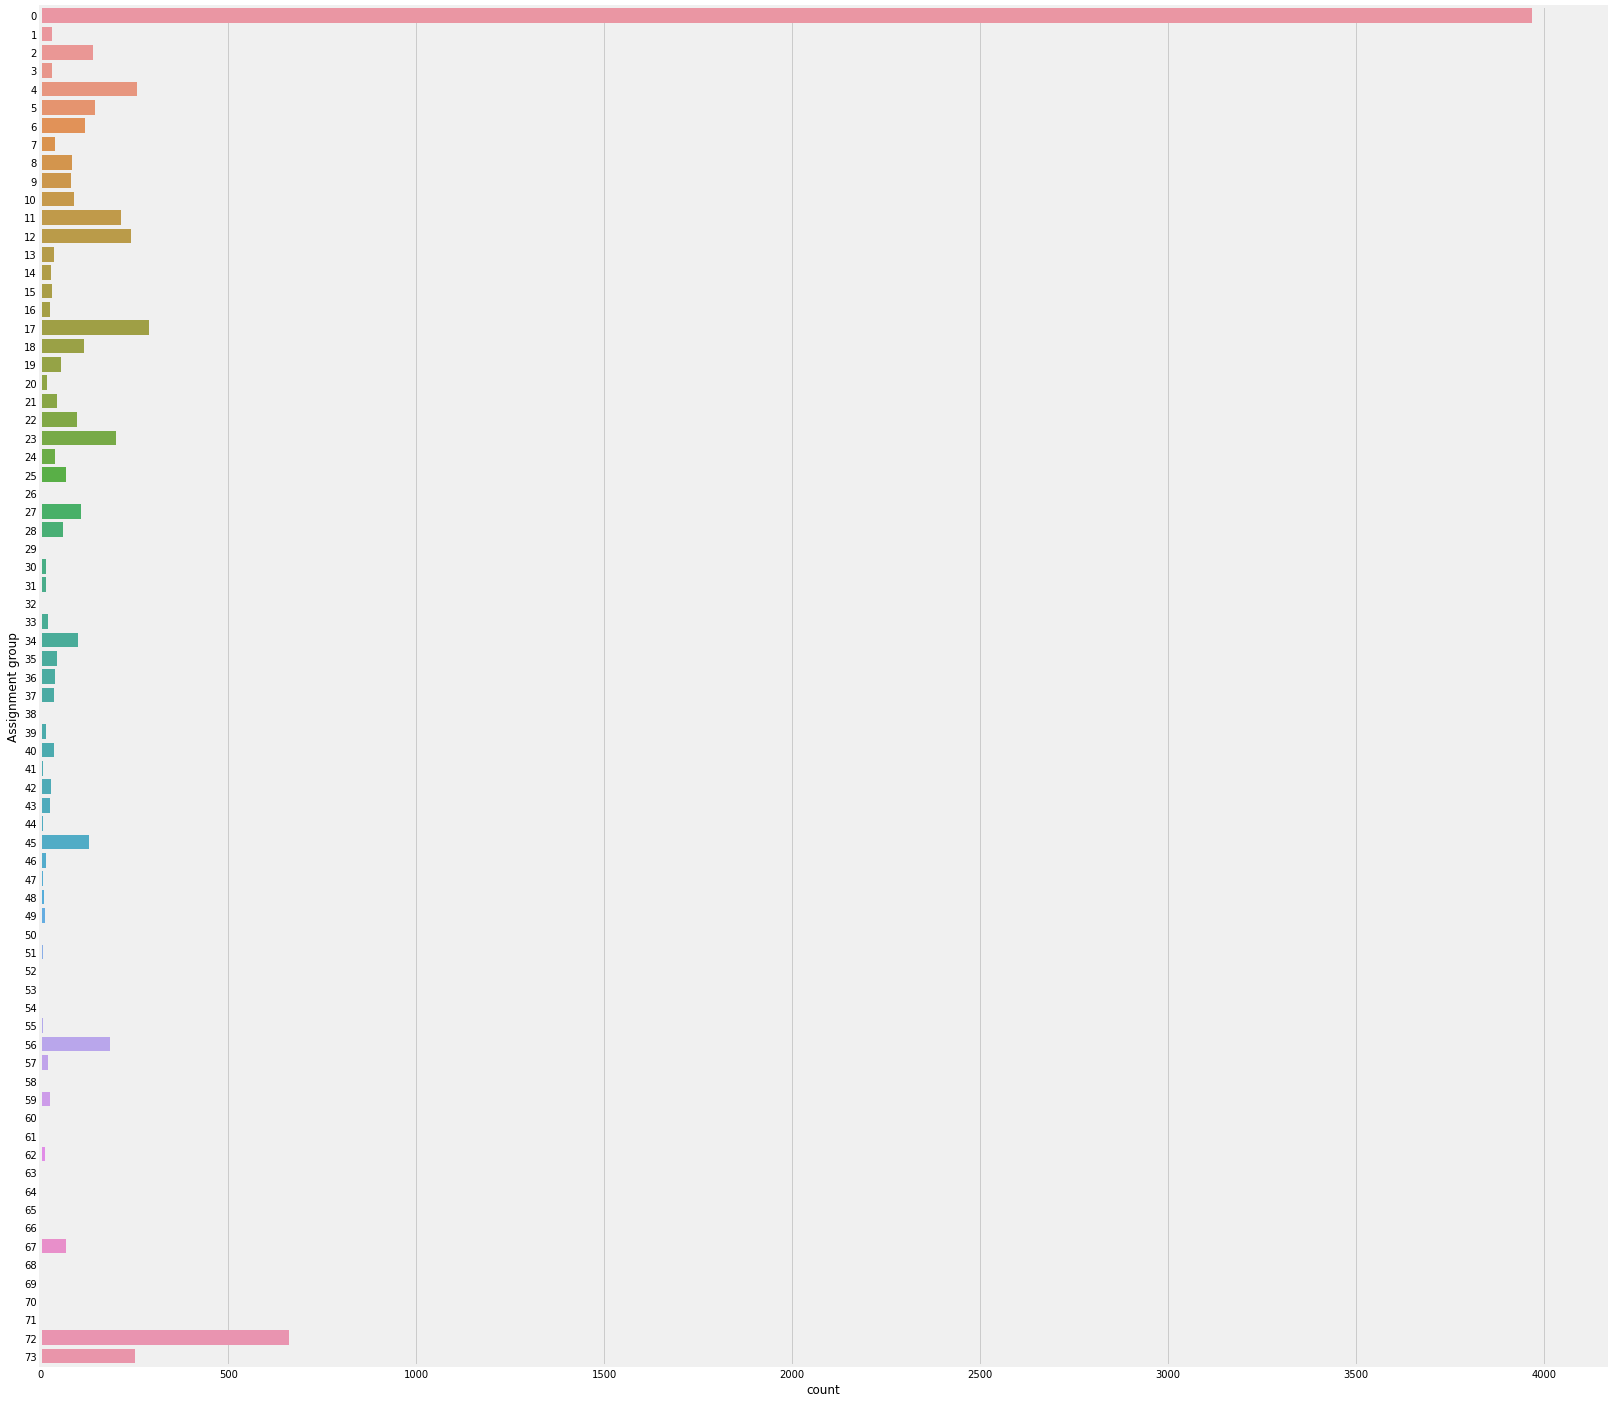

In [62]:
#Now let's plot the Assignment group after dropping the null values
group=df['Assignment group']
plt.figure(figsize=(25,25))
sns.countplot(y=group)
plt.show()

In [63]:
#Concate the two columns into one column Description
df['Description'] =  df['Short description'].str.cat(df['Description'], sep =" ") 
df.head()

,Short description,Description,Assignment group,target,num_words,bins
0,login issue,login issue -verified user details.(employee# ...,0,0,33,0-100
1,outlook,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,0,0,25,0-100
2,cant log in to vpn,cant log in to vpn \r\n\r\nreceived from: eylq...,0,0,11,0-100
3,unable to access hr_tool page,unable to access hr_tool page unable to access...,0,0,5,0-100
4,skype error,skype error skype error,0,0,2,0-100


In [0]:
#Creating a list of stop words 
stop_words = set(stopwords.words("english"))

In [0]:
from nltk.corpus import wordnet
#Define wordnet parts of speech tagging
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
#Method to remove duplicate words this method will be used since we are concatting two columns into one and to two avoid repeated words.
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

In [0]:
def preprocess_text(sentence):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(sentence))
    text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text)    
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # removing numbers
    text = re.sub(r"[0-9]","",text) 
    
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    #Convert to list from string
    text = text.split()
    
    #text = " ".join(unique_list(text))

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)    
    return text

In [0]:
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
"""import os
os.environ['KERAS_BACKEND']='theano' # Why theano why not"""
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

In [69]:
print(df.Description.shape[0])

8491


In [0]:
texts = []
labels = []


for idx in range(df.Description.shape[0]):
    text = BeautifulSoup(df.Description[idx])
    texts.append(preprocess_text(str(text.get_text())))
    df.Description[idx]=preprocess_text(str(df.Description[idx]))

for idx in df['Assignment group']:
    labels.append(idx)

In [0]:
MAX_SEQUENCE_LENGTH = 500
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [72]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 18


In [73]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


Shape of Data Tensor: (8491, 500)
Shape of Label Tensor: (8491, 74)


In [74]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", x_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions x_val dataset: ", x_val.shape) 
print("Number transactions y_val dataset: ", y_val.shape) 


Number transactions X_train dataset:  (6793, 500)
Number transactions y_train dataset:  (6793, 74)
Number transactions x_val dataset:  (1698, 500)
Number transactions y_val dataset:  (1698, 74)


In [0]:
glove_file = "/content/drive/My Drive/glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [76]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400001 word vectors in Glove 6B 100d.


In [0]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

**Building model using CNN**

In [80]:
#importing libraries for model building
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(5)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(len(macronum), activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Simplified convolutional neural network")
model.summary()
cp=ModelCheckpoint('model_cnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Simplified convolutional neural network
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 100)          1900      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 496, 128)          64128     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 99, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 95, 128)           82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)    

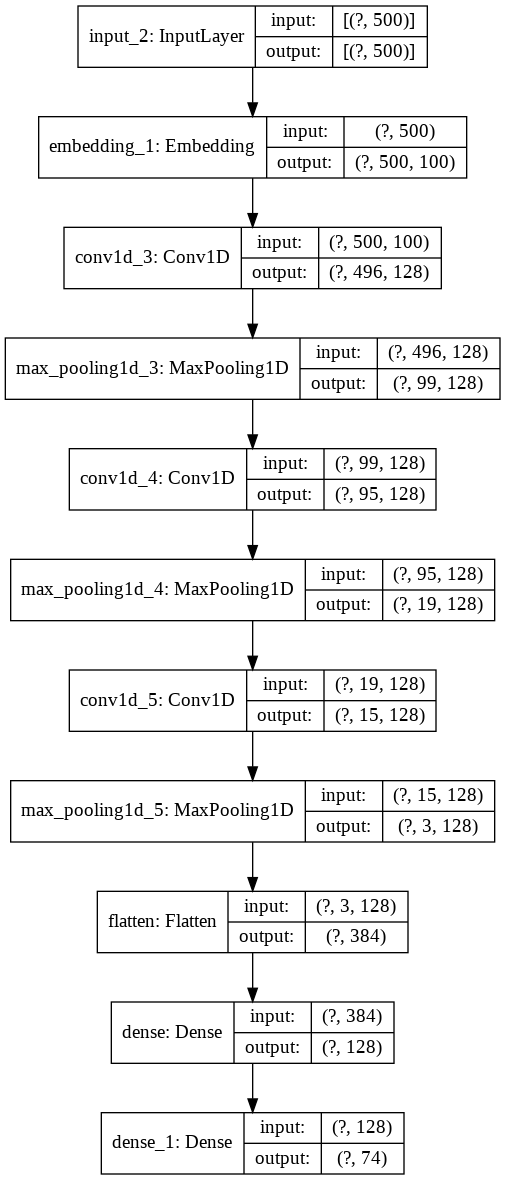

In [81]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model_plot1.png', show_shapes=True, show_layer_names=True)

In [82]:
batch_size = 100
epochs = 15
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=epochs, batch_size=batch_size,callbacks=[cp])

Train on 6793 samples, validate on 1698 samples
Epoch 1/15
6700/6793 [============================>.] - ETA: 0s - loss: 2.7161 - acc: 0.4584
Epoch 00001: val_acc improved from -inf to 0.50883, saving model to model_cnn.hdf5
6793/6793 [==============================] - 48s 7ms/sample - loss: 2.7157 - acc: 0.4589 - val_loss: 2.7342 - val_acc: 0.5088
Epoch 2/15
6700/6793 [============================>.] - ETA: 0s - loss: 2.2841 - acc: 0.5199
Epoch 00002: val_acc improved from 0.50883 to 0.51413, saving model to model_cnn.hdf5
6793/6793 [==============================] - 47s 7ms/sample - loss: 2.2883 - acc: 0.5188 - val_loss: 2.3508 - val_acc: 0.5141
Epoch 3/15
6700/6793 [============================>.] - ETA: 0s - loss: 2.1501 - acc: 0.5270
Epoch 00003: val_acc improved from 0.51413 to 0.52945, saving model to model_cnn.hdf5
6793/6793 [==============================] - 47s 7ms/sample - loss: 2.1462 - acc: 0.5275 - val_loss: 2.1210 - val_acc: 0.5294
Epoch 4/15
6700/6793 [==================

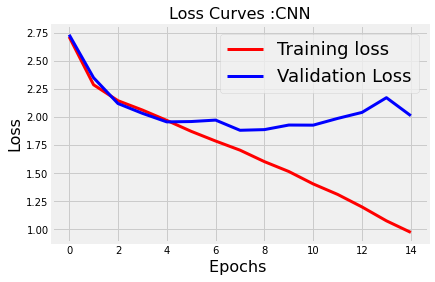

In [83]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

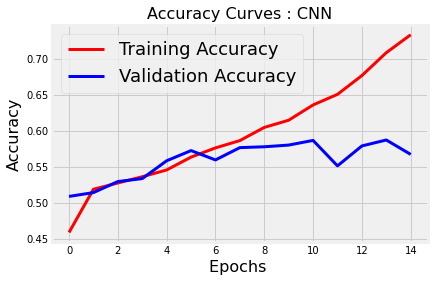

In [84]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

**Build model using RNN**

In [0]:
embedding_layer_rnn = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [86]:
sequence_input_rnn = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_rnn = embedding_layer_rnn(sequence_input_rnn)
l_lstm = Bidirectional(LSTM(128))(embedded_sequences_rnn)
preds_rnn = Dense(len(macronum), activation='softmax')(l_lstm)
model_rnn = Model(sequence_input_rnn, preds_rnn)
model_rnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model_rnn.summary()

Bidirectional LSTM
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 100)          1900      
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense_2 (Dense)              (None, 74)                19018     
Total params: 255,414
Trainable params: 255,414
Non-trainable params: 0
_________________________________________________________________


In [88]:
cp_rnn=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
batch_size = 100
epochs = 15
history_rnn=model_rnn.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=epochs, batch_size=batch_size,callbacks=[cp_rnn])

Train on 6793 samples, validate on 1698 samples
Epoch 1/15
6700/6793 [============================>.] - ETA: 3s - loss: 2.3702 - acc: 0.5034
Epoch 00001: val_acc improved from -inf to 0.51119, saving model to model_rnn.hdf5
6793/6793 [==============================] - 246s 36ms/sample - loss: 2.3743 - acc: 0.5030 - val_loss: 2.2201 - val_acc: 0.5112
Epoch 2/15
6700/6793 [============================>.] - ETA: 3s - loss: 2.1196 - acc: 0.5352
Epoch 00002: val_acc improved from 0.51119 to 0.53475, saving model to model_rnn.hdf5
6793/6793 [==============================] - 243s 36ms/sample - loss: 2.1184 - acc: 0.5353 - val_loss: 2.1473 - val_acc: 0.5347
Epoch 3/15
6700/6793 [============================>.] - ETA: 3s - loss: 2.0521 - acc: 0.5425
Epoch 00003: val_acc improved from 0.53475 to 0.55065, saving model to model_rnn.hdf5
6793/6793 [==============================] - 241s 36ms/sample - loss: 2.0537 - acc: 0.5425 - val_loss: 2.0268 - val_acc: 0.5506
Epoch 4/15
6700/6793 [============

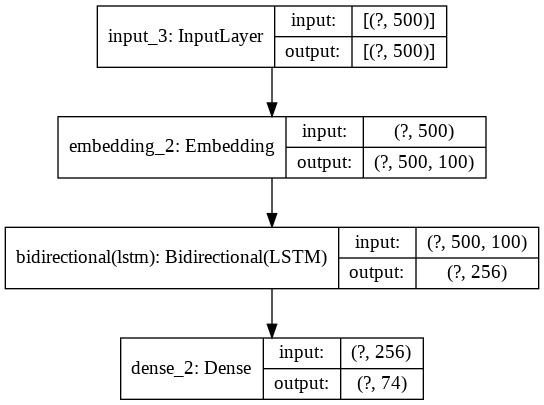

In [89]:
plot_model(model_rnn, to_file='/content/drive/My Drive/model_plot_rnn.png', show_shapes=True, show_layer_names=True)

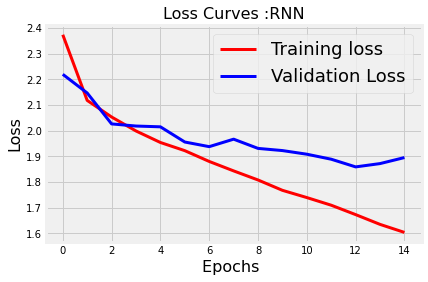

In [90]:
fig1 = plt.figure()
plt.plot(history_rnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

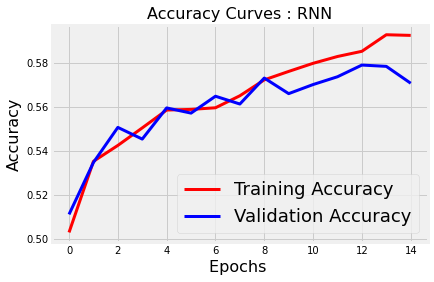

In [91]:
fig2=plt.figure()
plt.plot(history_rnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

In [0]:
df_final.describe()

In [0]:
from nltk.probability import FreqDist
text = str(df_final['Description'])
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
fdist.most_common(50)

fdist.plot(30)

In [0]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [0]:
show_wordcloud(df_final["Description"])

In [0]:
X = []
sentences = list(df_final["Description"])
for sen in sentences:
    X.append(sen)
y=df_final['Target']

In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Target'. 
y= label_encoder.fit_transform(y) 

In [0]:
from keras.utils import to_categorical
y = to_categorical(y)

In [0]:
maxlen = len(np.unique(df_final.Description.values))

print(maxlen)

In [0]:
maxlen = 1266
tokenizer = Tokenizer(num_words=maxlen,split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 200
X = pad_sequences(X, padding='post', maxlen=maxlen)
y= pad_sequences(y, padding='post', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [0]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

 **Weight matrix using GloVe embeddings**

In [0]:
glove_file = "/content/drive/My Drive/glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = '/content/glove.6B.100d.txt'
embeddings_dictionary = {}
for o in open(EMBEDDING_FILE):
    records = o.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

print('Found %s word vectors.' % len(embeddings_dictionary))

In [0]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedd_index['good']

In [0]:
#importing libraries for model building
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [0]:

model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix]))
model.add(LSTM(64, return_sequences = True))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
print(model.summary())

In [0]:
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model_plot1.png', show_shapes=True, show_layer_names=True)

In [0]:
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model_plot1.png', show_shapes=True, show_layer_names=True)
batch_size = 150
epochs = 5
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=1)#,validation_data=(X_test, y_test)

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [0]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  lossacc=history.history['loss']
  testloss=history.history['val_loss']
  lossepochs=range(len(lossacc))
  plt.plot(lossepochs,lossacc)
  plt.plot(lossepochs,testloss)

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.figure()

In [0]:
plot_accuracy(history)

In [0]:
data = df_final

In [0]:
data.head()

In [0]:
data['target'] = data.Target.astype('category').cat.codes

In [0]:
data['num_words'] = data.Description.apply(lambda x : len(x.split()))

In [0]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [0]:
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [0]:
word_distribution.head()

In [0]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [0]:
num_class = len(np.unique(data.Target.values))
y = data['target'].values

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [0]:
data['Description'] = data['Description'].astype(str)

In [0]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

In [0]:
data['Description']=data['Description'].apply(lambda x: ' '.join(unique_list(x.split())))

In [0]:
data_description = data.Description.values

In [0]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

In [0]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

In [0]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

In [0]:
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [0]:
final_doc = data['Description']
all_documents = tuple(final_doc)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

In [0]:

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

In [0]:
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

In [0]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [0]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

In [0]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [0]:
pip install pyLDAvis

In [0]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [0]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05,random_state=42)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

In [0]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
#filepath="weights-simple.hdf5"
#checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.20, 
          shuffle=True, epochs=10)

In [0]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [0]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

In [0]:
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=5)
    plt.xlabel('Predicted label', fontsize=5)

In [0]:
data.head()

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(data.Target.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(50,50))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

In [0]:
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.20, 
          shuffle=True, epochs=20)

In [0]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

In [0]:
encoder = LabelEncoder()
encoder.fit(data.Target.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(60,60))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()